In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../../")

%matplotlib inline
import matplotlib.pylab as plt

In [2]:
import ld_gan
import scipy.misc
import numpy as np
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [3]:
PATH = "eval_imgs/xf_111v1.py/"

# load generated imgs

In [4]:
imgs_fake = [scipy.misc.imread(os.path.join(PATH, n)) for n in tqdm(os.listdir(PATH))]
imgs_fake = np.array(imgs_fake)

100%|██████████| 50176/50176 [01:19<00:00, 631.73it/s]


# load original imgs

In [5]:
imgs_real, _ = ld_gan.data_proc.data_loader.load_data(1, verbose=1, resize = 64)

100%|██████████| 102/102 [00:38<00:00,  4.52it/s]

load data from '/export/home/oblum/projects/ld_gan/data/flowers_102/jpg_256'


# find nearest neighbors

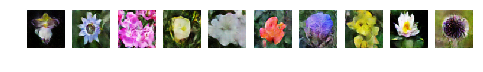

In [6]:
ld_gan.visualize.disp(imgs_fake[:10])

In [7]:
flat_fake  = imgs_fake.reshape((imgs_fake.shape[0], -1))
flat_real = imgs_real.reshape((imgs_real.shape[0], -1))

In [8]:
nn = NearestNeighbors(n_neighbors=1).fit(flat_real)
_, idxs = nn.kneighbors(flat_fake[:100])

In [10]:
plt.rcParams['figure.figsize'] = (8, 2)

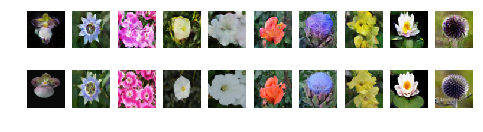

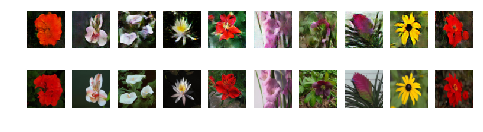

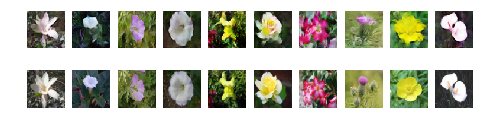

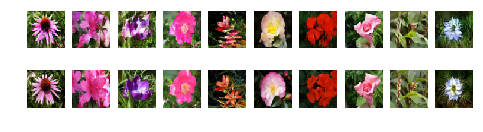

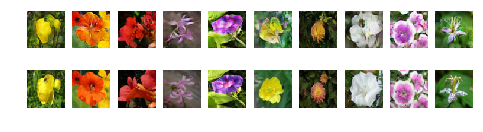

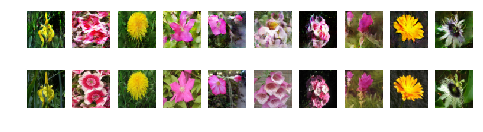

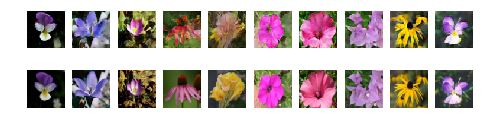

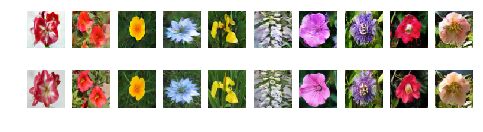

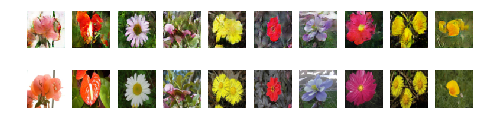

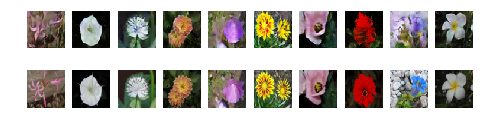

In [11]:
for i in range(10):
    l = i * 10
    h = (i+1)*10
    fake = imgs_fake[l:h]
    real = imgs_real[idxs[:,0][l:h]]
    imgs = np.concatenate([fake, real])
    ld_gan.visualize.disp_array(imgs, (2,10))

In [15]:
len(imgs_fake)

50176

In [13]:
len(imgs_real)

8188